In [107]:
import yfinance as yf
import pandas as pd
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sys


In [109]:
corp_name = str('cacccc').strip()
corp = yf.Ticker(corp_name)
try:
	corp_check = corp.history()
	if corp_check.empty:
		raise Exception
	else: 
		df_cop = yf.download(corp_name)
except: 
    print("Unidentify ticker named:",corp_name)
    print("Get more information about Ticker at: https://www.google.com/search?q=what+is+stock+ticker")

df = df_cop.copy()

CACCCC: No data found, symbol may be delisted
Unidentify ticker named: cacccc
Get more information about Ticker at: https://www.google.com/search?q=what+is+stock+ticker


# Historical Data Visualization

# DATA

In [36]:
data = df.filter(['Close']) #Drop all except 'Close' column

In [37]:
#Get date time column to plot
date = data.index
date=np.array([date],dtype=np.datetime64).reshape(-1,1)
date = date.astype('datetime64[D]')


In [38]:
#Drop date column, norm to nparray
df = np.array(data).reshape(-1,1)
df

array([[  1.59266698],
       [  1.58866704],
       [  1.46399999],
       ...,
       [184.13000488],
       [180.13000488],
       [183.25      ]])

In [39]:
df.shape

(3203, 1)

In [40]:
#normalize data to 0->1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))
scaled_df[-5:]

array([[0.44558385],
       [0.43871204],
       [0.44771144],
       [0.4379295 ],
       [0.4455594 ]])

In [41]:
scaled_df.shape

(3203, 1)

In [42]:
#gen train data len 
training_data_len = math.ceil(len(scaled_df)*1) 


In [43]:
training_data_len

3203

In [44]:
#cut off train data 
train_data = scaled_df[0:training_data_len,:]
x_train = []
y_train = []    
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    #y_train value not in corresponding_index of x_train  
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([1.31893362e-03, 1.30915180e-03, 1.00428027e-03, 5.54310805e-04,
       5.05407544e-05, 0.00000000e+00, 2.70634579e-04, 2.60852469e-04,
       2.03792057e-04, 3.81495574e-04, 6.58652434e-04, 6.66803171e-04,
       7.89077648e-04, 9.96129534e-04, 7.33645693e-04, 7.20604046e-04,
       8.47769140e-04, 8.95047734e-04, 8.39618402e-04, 7.74404629e-04,
       8.02119295e-04, 7.41799054e-04, 6.74953909e-04, 8.34727493e-04,
       1.00264919e-03, 8.90156824e-04, 7.58100530e-04, 6.17893497e-04,
       6.19524578e-04, 5.26596139e-04, 3.42368009e-04, 2.93458335e-04,
       4.10841611e-04, 4.85837203e-04, 5.46160067e-04, 4.84206122e-04,
       4.87468283e-04, 5.38006705e-04, 7.05931027e-04, 5.54310805e-04,
       6.68434252e-04, 6.43979415e-04, 6.35826345e-04, 6.63543343e-04,
       5.99960650e-04, 7.58100530e-04, 8.57551250e-04, 8.55919878e-04,
       7.72773549e-04, 8.31465041e-04, 8.00490546e-04, 7.12453017e-04,
       8.02119295e-04, 8.67333068e-04, 1.00754010e-03, 8.37987322e-04,
     

In [45]:
x_train, y_train = np.array(x_train), np.array(y_train)
#reshape x_train to only 1 column
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(3143, 60, 1)

In [46]:
x_train

array([[[1.31893362e-03],
        [1.30915180e-03],
        [1.00428027e-03],
        ...,
        [8.57551250e-04],
        [8.10272656e-04],
        [6.63543343e-04]],

       [[1.30915180e-03],
        [1.00428027e-03],
        [5.54310805e-04],
        ...,
        [8.10272656e-04],
        [6.63543343e-04],
        [6.13002588e-04]],

       [[1.00428027e-03],
        [5.54310805e-04],
        [5.05407544e-05],
        ...,
        [6.63543343e-04],
        [6.13002588e-04],
        [7.01040118e-04]],

       ...,

       [[3.64809445e-01],
        [3.63929068e-01],
        [3.34412071e-01],
        ...,
        [4.24112481e-01],
        [4.45583845e-01],
        [4.38712036e-01]],

       [[3.63929068e-01],
        [3.34412071e-01],
        [3.33849620e-01],
        ...,
        [4.45583845e-01],
        [4.38712036e-01],
        [4.47711444e-01]],

       [[3.34412071e-01],
        [3.33849620e-01],
        [3.03965759e-01],
        ...,
        [4.38712036e-01],
        [4.4771

In [47]:
y_train.shape

(3143,)

# Modelling

In [48]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))

In [49]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#testing to find best epoch and batch_size
model.fit(x_train, y_train, batch_size=40, epochs=20)

Epoch 1/20
79/79 [==============================] - 9s 47ms/step - loss: 0.0039
Epoch 2/20
79/79 [==============================] - 4s 49ms/step - loss: 6.0072e-04
Epoch 3/20
79/79 [==============================] - 4s 50ms/step - loss: 4.7361e-04
Epoch 4/20
79/79 [==============================] - 5s 66ms/step - loss: 4.7505e-04
Epoch 5/20
79/79 [==============================] - 6s 74ms/step - loss: 4.1049e-04
Epoch 6/20
79/79 [==============================] - 5s 68ms/step - loss: 4.4664e-04
Epoch 7/20
79/79 [==============================] - 5s 63ms/step - loss: 3.2333e-04
Epoch 8/20
79/79 [==============================] - 4s 55ms/step - loss: 3.4845e-04
Epoch 9/20
79/79 [==============================] - 4s 49ms/step - loss: 3.0184e-04
Epoch 10/20
79/79 [==============================] - 4s 51ms/step - loss: 2.7945e-04
Epoch 11/20
79/79 [==============================] - 4s 48ms/step - loss: 2.7515e-04
Epoch 12/20
79/79 [==============================] - 4s 48ms/step - loss: 2.83

# Testing & Evaluation

In [50]:
x_test = []
y_test = df[training_data_len-60: , :] #60 last data
for i in range(len(scaled_df)-60,len(scaled_df)): #commit: change (len)test_data to len(scaled_df)
    x_test.append(scaled_df[i-60:i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
#y_test still not in x_test with corresponding_index
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [51]:
print(scaler.inverse_transform(x_test[-1]))
print(y_test[-1])

[[137.80000305]
 [137.57000732]
 [125.34999847]
 [123.15000153]
 [109.09999847]
 [112.70999908]
 [121.81999969]
 [123.18000031]
 [108.09999847]
 [113.63999939]
 [110.33999634]
 [113.05999756]
 [119.76999664]
 [118.84999847]
 [123.22000122]
 [123.55999756]
 [122.40000153]
 [131.49000549]
 [128.77999878]
 [127.16999817]
 [133.41999817]
 [143.75      ]
 [143.88999939]
 [144.42999268]
 [160.27000427]
 [177.8999939 ]
 [166.66000366]
 [173.22000122]
 [181.41000366]
 [188.27000427]
 [189.97999573]
 [194.75999451]
 [196.80999756]
 [201.28999329]
 [207.32000732]
 [196.88999939]
 [194.63999939]
 [209.25      ]
 [214.24000549]
 [202.03999329]
 [208.30999756]
 [197.36999512]
 [200.86000061]
 [202.07000732]
 [196.88000488]
 [207.63000488]
 [205.71000671]
 [202.77000427]
 [190.8999939 ]
 [197.78999329]
 [193.80999756]
 [187.71000671]
 [182.        ]
 [172.91999817]
 [173.44000244]
 [174.47999573]
 [183.25999451]
 [180.44999695]
 [184.13000488]
 [180.13000488]]
[183.25]


In [52]:
test = model.predict(x_test)
test = scaler.inverse_transform(test)
rmse = np.sqrt(np.mean(test-y_test)**2) 
rmse

2/2 [==============================] - 2s 31ms/step


4.391838455200196

# Prediction

In [53]:
new_df = scaled_df.copy()
n = 30 #day predicting
x_predict = x_test.copy()

In [54]:
for i in range(n):
    predict = model.predict(x_predict)
    np.append(new_df, predict[-1])
    for i in range(len(new_df)-60, len(new_df)):
        np.append(x_predict, new_df[i-60:, 0])

2/2 [==============================] - 0s 16ms/step


# Visualization of Testing & Predicting

C:\Users\Admin\AppData\Local\Temp\ipykernel_9548\1997051861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['test'] = test


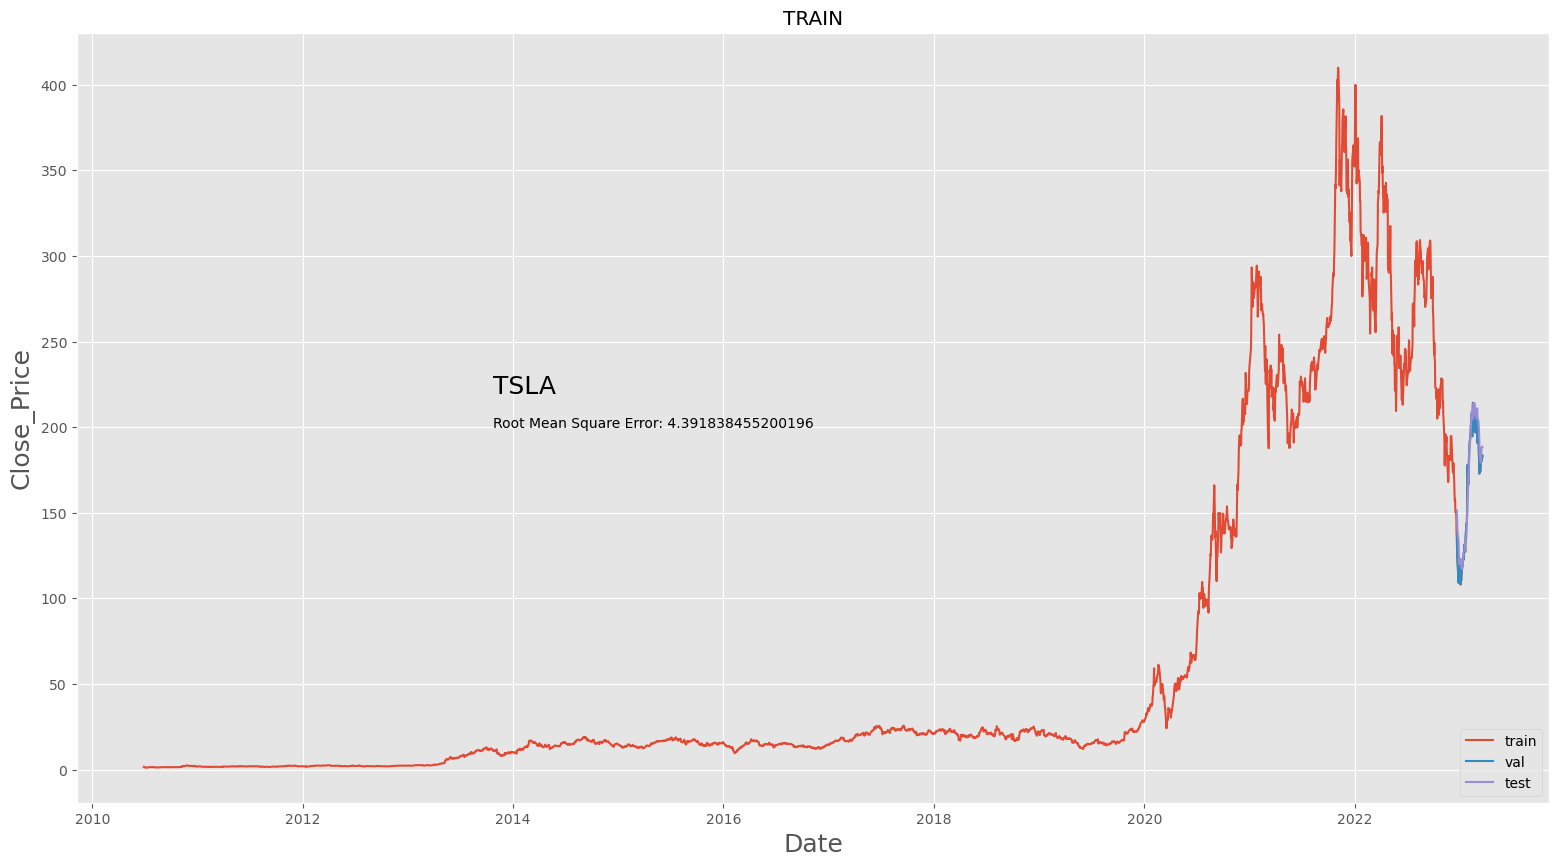

In [55]:
train = data[:training_data_len]
val = data[training_data_len-60:]
val['test'] = test
plt.style.use('ggplot')
plt.figure(figsize=(19, 10))
plt.title('TRAIN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','test']])
plt.legend(['train', 'val', 'test'], loc = 'lower right')
plt.text(16000,220, corp, fontsize=18)
plt.text(16000,200,'Root Mean Square Error: %s'%rmse.astype(str))
plt.show()

c:\Users\Admin\.conda\envs\trade\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


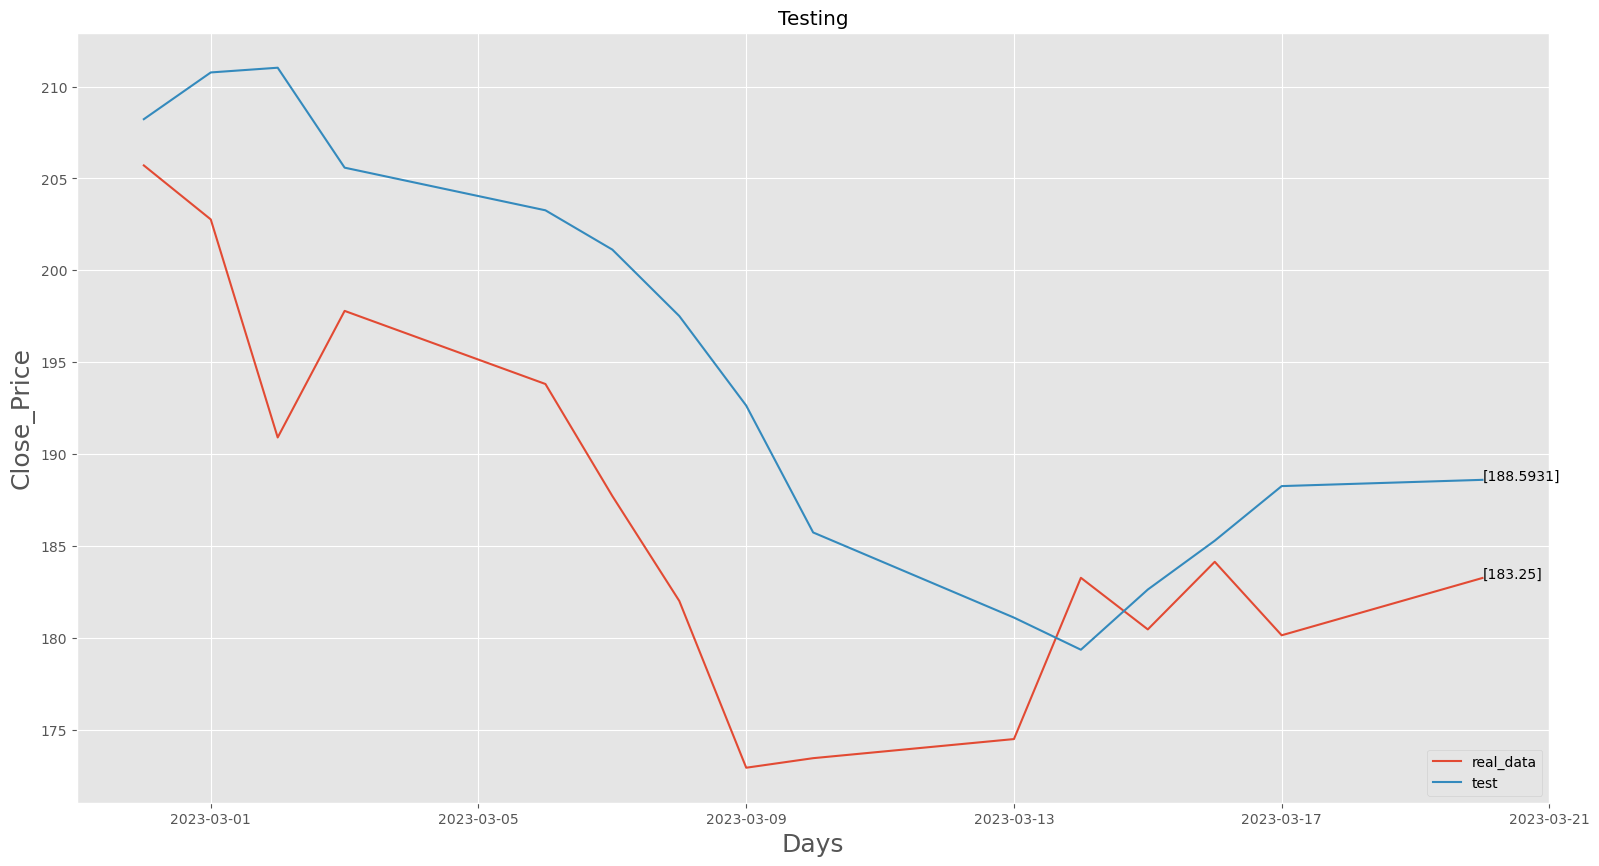

In [56]:
day_show = 15 #So ngay muon show
real_data = df[training_data_len-day_show:]
plt.style.use('ggplot')

plt.figure(figsize=(19,10))
plt.title('Testing')
plt.plot(date[training_data_len-day_show:],real_data)
plt.plot(date[training_data_len-day_show:],test[-day_show:])
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['real_data', 'test'], loc = 'lower right')
plt.text(date[-1],test[-1],test[-1])
plt.text(date[-1],real_data[-1],real_data[-1])
plt.show()

In [57]:
predict = scaler.inverse_transform(predict)

c:\Users\Admin\.conda\envs\trade\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


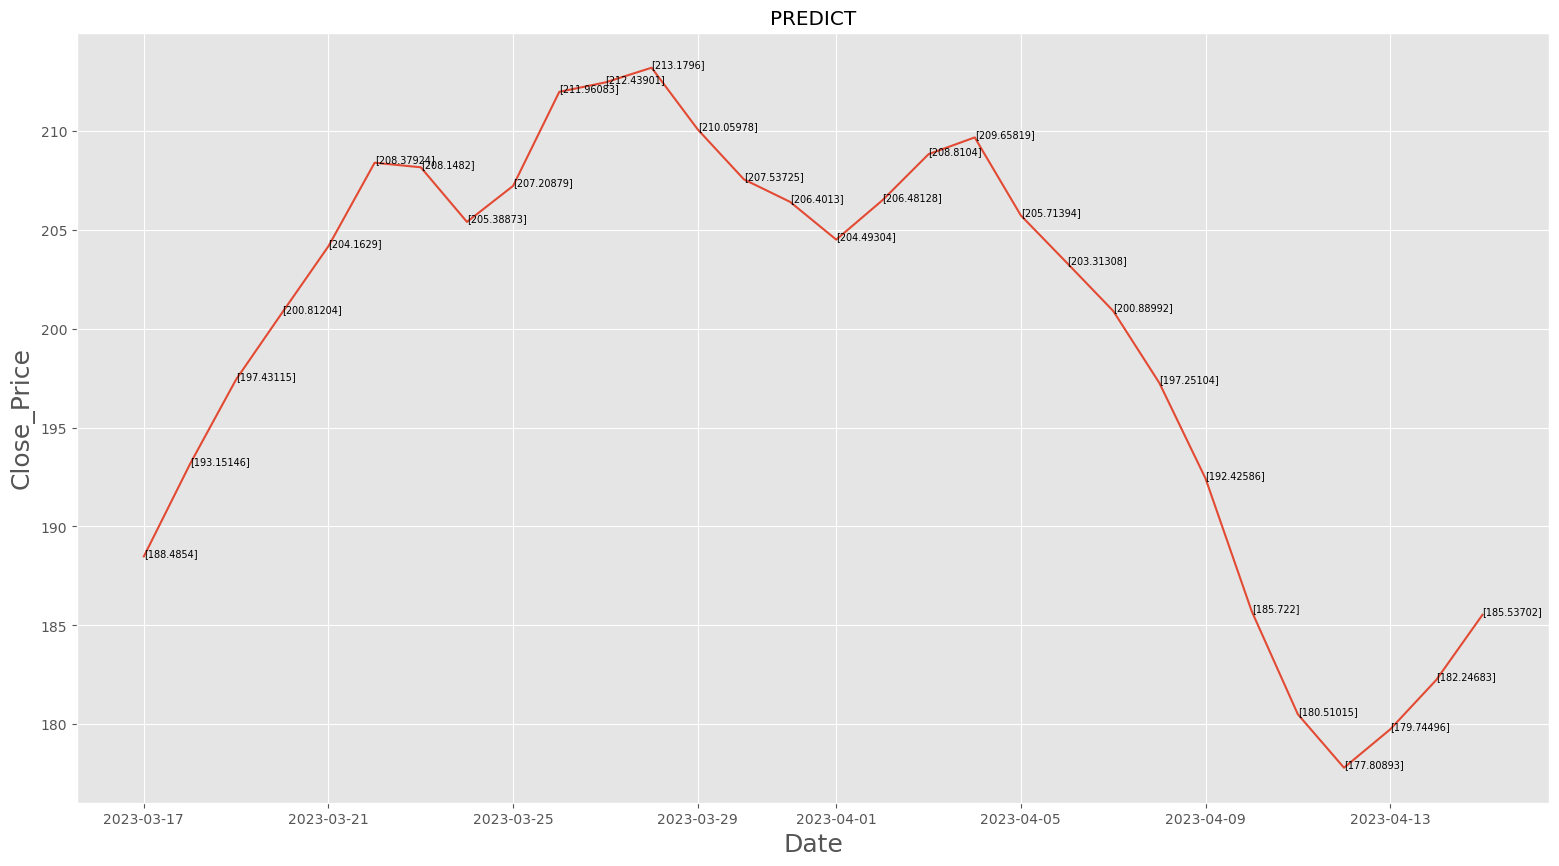

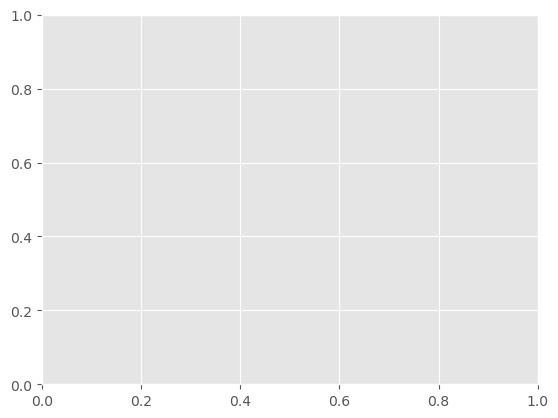

In [79]:
date_predict = date[-1]
for i in range(n-1):
    date_predict=np.append(date_predict,date_predict[-1]+1).reshape(-1,1)
plt.style.use('ggplot')
plt.figure(figsize=(19, 10))
plt.title('PREDICT')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(date_predict,predict[-n:])
for i in range(date_predict.shape[0]):
    plt.text(date_predict[i],predict[n+i],predict[n+i],fontsize=7)

# plt.show()
plt.savefig('predict.png', bbox_inches='tight')
